In [1]:
%%html
<style>
table {float:left;}
</style>

In [2]:
# Import the libs
import numpy as np
import pandas as pd 

from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.dummy import DummyRegressor

%matplotlib inline 
plt.rcParams['figure.figsize'] = (15.0, 10.0)

/Users/romandek/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# Intro

Skin cancer (melanoma) prediction.

https://www.kaggle.com/anmolkumar/machine-hack-melanoma-tumor-size-prediction

## Motyvation

- Medical and bio-infarmatics data has always been a mystery to me
- I wanted a challenge
- And a big data set 

## To-do

1. Organize the data
2. Clean and prepare data 
3. Prepare features and the model
4. Choose regressors
5. Train and validate the models
6. Choose the best model with test data
7. Conclusions 🎉

## Hypothesis

It is possible to predict size of a melanoma tumour from the dataset features with determination coefficient R$^{2}$ of at least 0.8.

## Data description 
| Kintamasis | Aprašymas |
| :-- | :------- | 
| mass_npea | Mass of the skin sample | 
| size_npear | Size of the skin sampe | 
| malign_ratio | Ratio of normal to malign skin area |
| damage_size | Unreacoverably damaged area of the skin | 
| exposed_area | Area exposed to the cancer | 
| std_dev_malign | Standard deviation of skin measurements | 
| err_malign | Measirement errors | 
| malign_penalty | Measurement error correction | 
| damage_ratio | Ratio of damaged to exposed area | 
| tumor_size | Melanoma tumor size | 

## 1. Data organizing

In [3]:
# Importing
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./sample.csv')

# Join test features and target variables into a single DataFrame
test = test.join(sample);

In [4]:
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [5]:
test.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554,3.418762
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410,7.348026
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778,3.096391
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027,10.489805
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449,27.416072


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36584 entries, 0 to 36583
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       36584 non-null  float64
 1   size_npear      36584 non-null  float64
 2   malign_ratio    36584 non-null  float64
 3   damage_size     36584 non-null  float64
 4   exposed_area    36584 non-null  float64
 5   std_dev_malign  36584 non-null  float64
 6   err_malign      36584 non-null  float64
 7   malign_penalty  36584 non-null  int64  
 8   damage_ratio    36584 non-null  float64
 9   tumor_size      36584 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


**Comment**

The data is clean, data types were inferred correctly, we can carry on.

In [8]:
train.describe(include='all')

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


**Comment** 

We are interested in `min`, `max`, `standard deviation` of variables. Everything looks adequate.

In [9]:
test.describe(include='all')

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,36584.000000,36584.000000,36584.000000,36584.000000,3.658400e+04,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000
mean,9863.733201,3013.502009,0.302219,103.390012,1.367263e+06,145.471517,3988.960923,70.006424,34.539167,7.709129
std,4057.545455,1464.816338,0.062973,55.417297,5.638794e+05,69.870382,2043.358639,56.669800,5.981472,3.266043
min,2392.050000,403.500000,0.092500,11.096100,3.194902e+05,32.865300,0.000000,0.000000,15.312300,-13.443367
25%,6925.620000,1977.807500,0.258680,63.450275,9.522376e+05,94.557150,3161.480000,31.000000,30.451775,5.615304
50%,8899.305000,2664.105000,0.299940,87.635250,1.237236e+06,126.184500,3838.820000,54.000000,35.310750,7.568946
75%,12127.625000,3777.537500,0.342873,133.496000,1.690452e+06,181.273750,4638.547500,91.000000,38.880025,9.637913
max,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900,29.259045


## 2. Data cleaning and preparation

In [10]:
# Rename the variables for convenience
train = train.rename(columns={'mass_npea': 'study_mass', 'size_npear': 'study_area', })
test = test.rename(columns={'mass_npea': 'study_mass', 'size_npear': 'study_area', })

In [11]:
# Calculate damage ratio

train['d_ratio'] = train['damage_size'] / train['exposed_area']

test['d_ratio'] = test['damage_size'] / test['exposed_area']

### Distributions

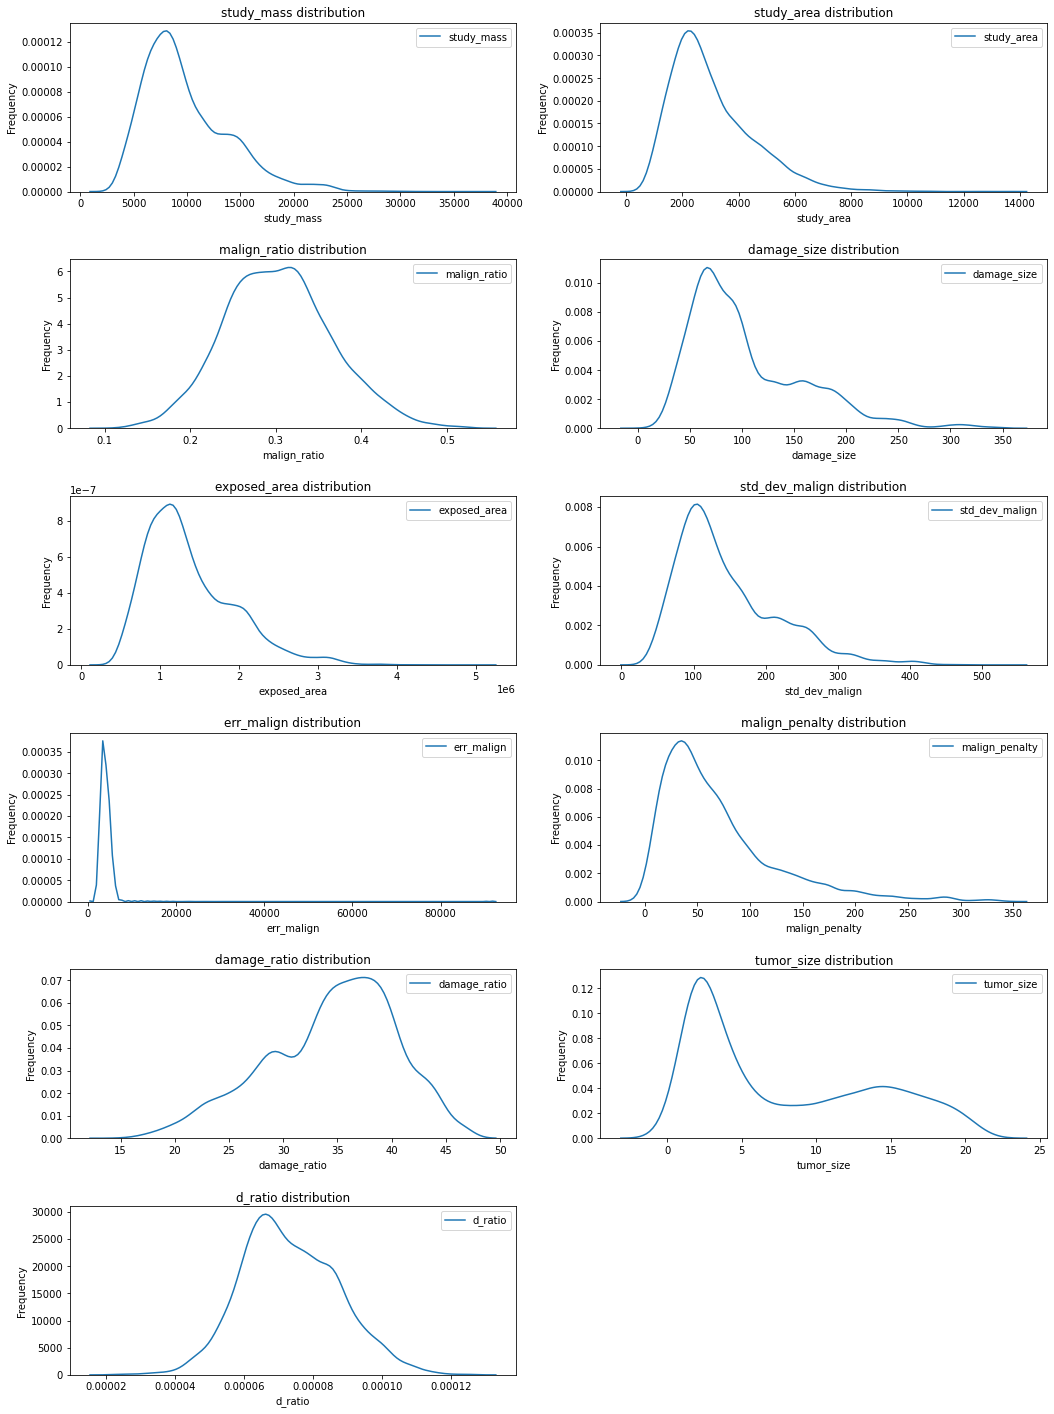

In [12]:
fig = plt.figure(figsize=(15,20))

for column, i in zip(train.columns, range(1,len(train.columns)+1)):
    ax = fig.add_subplot(6,2,i)
    sns.kdeplot(train[column])
    plt.title('{} distribution'.format(column))
    plt.xlabel(column)
    plt.ylabel('Frequency')
fig.tight_layout(pad=2);

**Comment**

Most variables are positively skewed and have quite a few outliers. Let's see what violin plots show.

In [13]:
def plot_violin_dist():
    fig = plt.figure(figsize=(15,20))

    for column, i in zip(train.columns, range(1,len(train.columns)+1)):
        ax = fig.add_subplot(6,2,i)
        sns.violinplot(train[column],orient='h')
        plt.title('{} distribution'.format(column))
        plt.xlabel(column)
    fig.tight_layout(pad=2);

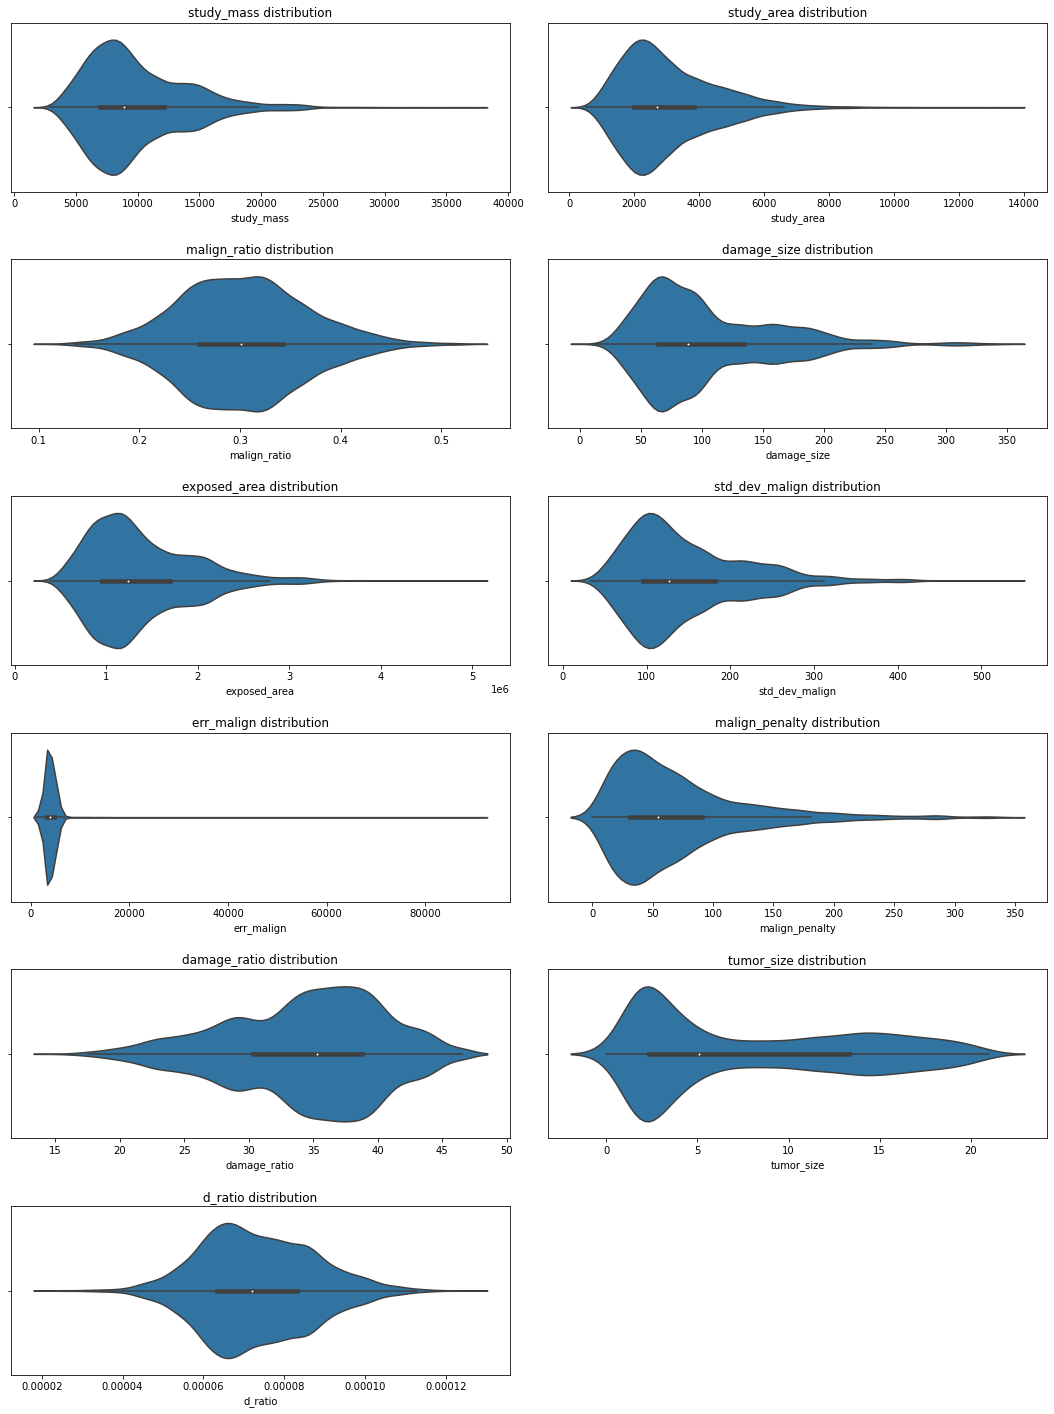

In [14]:
plot_violin_dist()

**Comment**

We can see very long tails, which means there are quite a few outliers in some variables. Let's calculate the outlier percentage value.

In [15]:
def outliers_pct(array, iqr_mutiplier=1.5):
    
    outliers = []
    
    Q1 = np.percentile(array,25,interpolation='midpoint')
    Q3 = np.percentile(array,75,interpolation='midpoint')

    IQR = Q3-Q1
    
    min_whisker = Q1 - iqr_mutiplier * IQR
    
    max_whisker = Q3 + iqr_mutiplier * IQR
    
    outliers = array[array < min_whisker]
    outliers += array[array > max_whisker]
    
    pct = len(outliers) / len(array) * 100
    
    return pct
    
for column in train.columns:    
    print(column, outliers_pct(train[column]))
    
print("----------------------------------------------------------------")    
    
for column in test.columns:
    print(column, outliers_pct(test[column]))

study_mass 0.0
study_area 0.0
malign_ratio 0.09840367373715286
damage_size 0.0
exposed_area 0.0
std_dev_malign 0.0
err_malign 0.0
malign_penalty 0.0
damage_ratio 0.16400612289525476
tumor_size 0.0
d_ratio 0.20774108900065602
----------------------------------------------------------------
study_mass 0.0
study_area 0.0
malign_ratio 0.11207085064509074
damage_size 0.0
exposed_area 0.0
std_dev_malign 0.0
err_malign 0.0027334353815875794
malign_penalty 0.0
damage_ratio 0.36081347036956046
tumor_size 0.5548873824622786
d_ratio 0.1585392521320796


**Comment**

Outliers don't exceet 15%, so we can remove them. 

### Removing the outliers

In [16]:
def get_whiskers(array, iqr_mutiplier=1.5):
    
    """Removes values bigger than 1.5 IQR"""
    
    outliers = []
    
    Q1 = np.percentile(array,25,interpolation='midpoint')
    Q3 = np.percentile(array,75,interpolation='midpoint')

    IQR = Q3-Q1
    
    min_whisker = Q1 - iqr_mutiplier * IQR
    
    max_whisker = Q3 + iqr_mutiplier * IQR
    
    return min_whisker, max_whisker

print(train.shape)

for column in train.columns:
    
    min_cap, max_cap = get_whiskers(train[column])
    
    index = train[(train[column] < min_cap) | (train[column] > max_cap)].index

    train.drop(index, inplace=True)

for column in test.columns:
    
    min_cap, max_cap = get_whiskers(test[column])
    
    index = test[(test[column] < min_cap) | (test[column] > max_cap)].index

    test.drop(index, inplace=True)
    
print(train.shape)

(9146, 11)
(7875, 11)


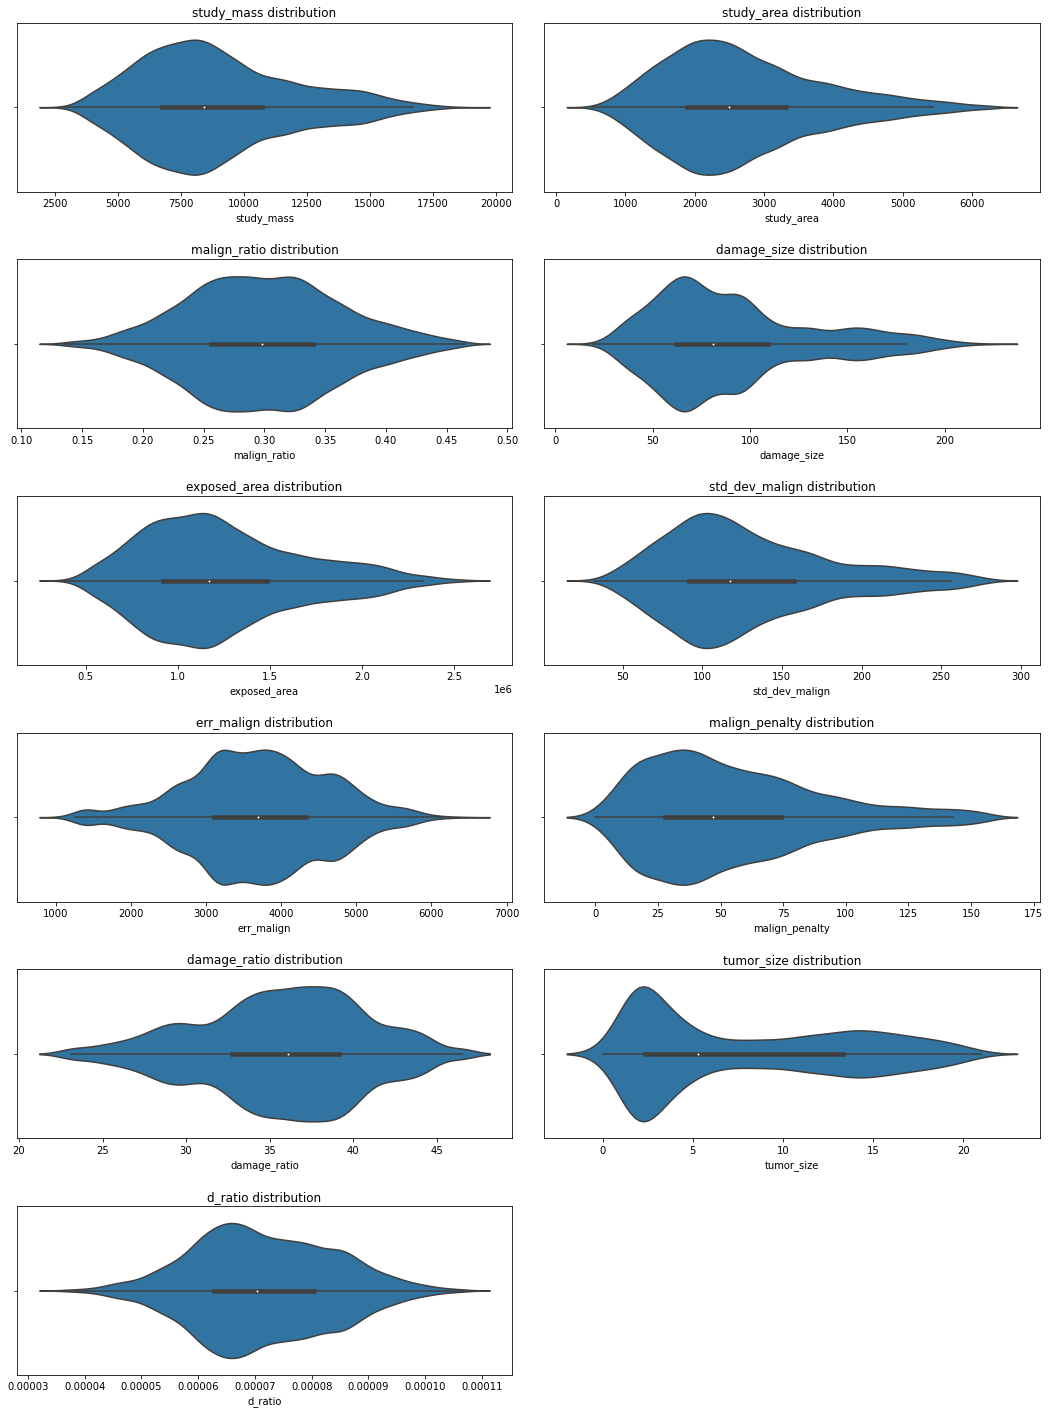

In [17]:
plot_violin_dist()

**Comment**

Looks much better!

### Scale the data

In [18]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(train)
train = pd.DataFrame(scaled_data, columns=train.columns)

scaled_data = scaler.fit_transform(test)
test = pd.DataFrame(scaled_data, columns=test.columns)

### Normalize the distributions

In [19]:
pt = PowerTransformer()

cols = train.columns
train = pd.DataFrame(pt.fit_transform(train), columns=cols)

cols = test.columns
test = pd.DataFrame(pt.fit_transform(test), columns=cols)

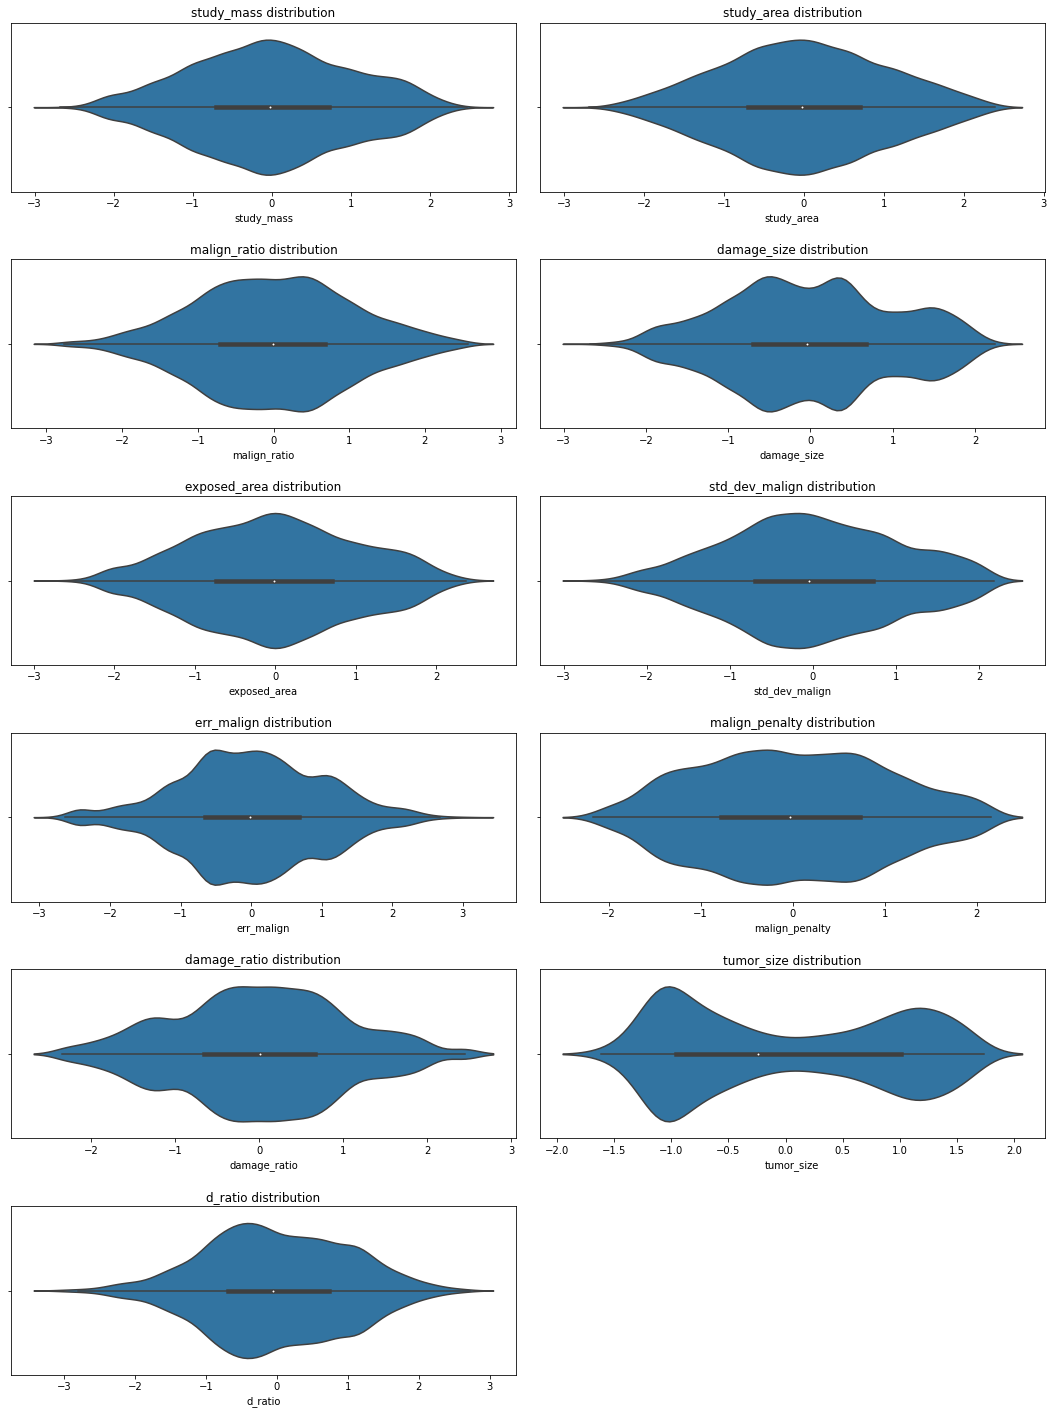

In [20]:
plot_violin_dist()

**Comment** 

We see that most variables are mostly normally distributed. 🎉 

## 3. Model preparation

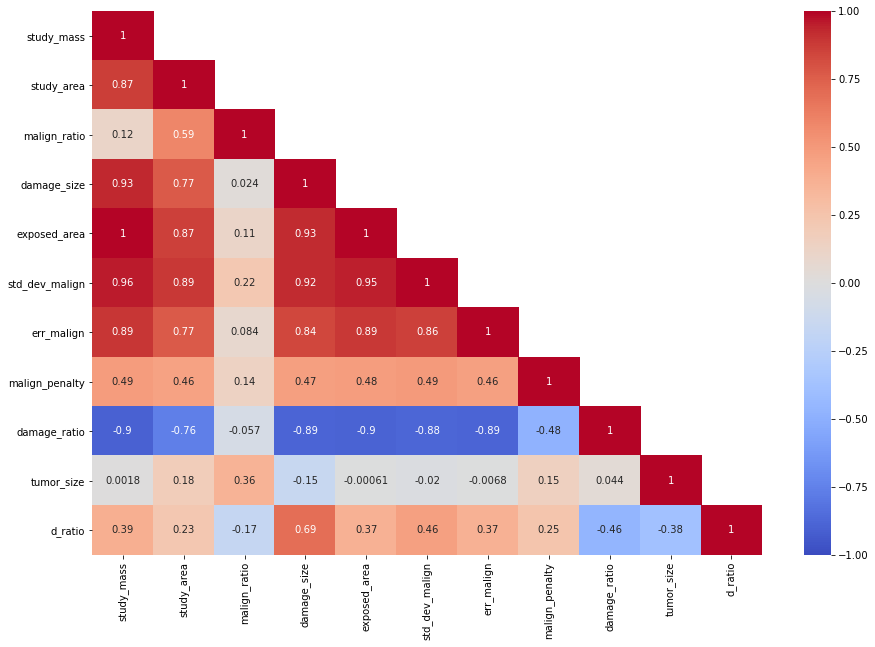

In [21]:
mask = ~np.tri(train.shape[1], dtype=bool)
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask=mask);

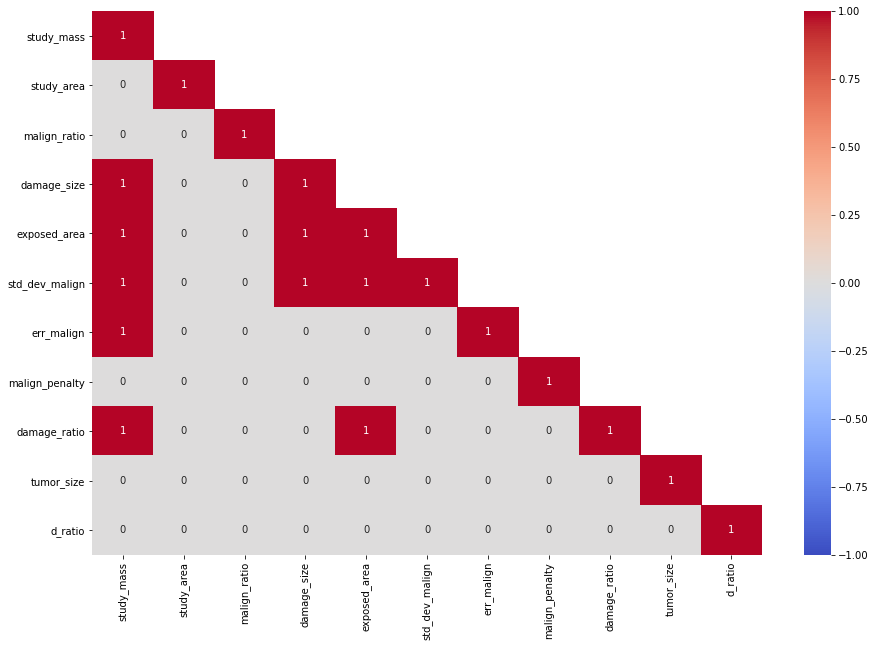

In [22]:
sns.heatmap(abs(train.corr())>.89, vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask=mask);

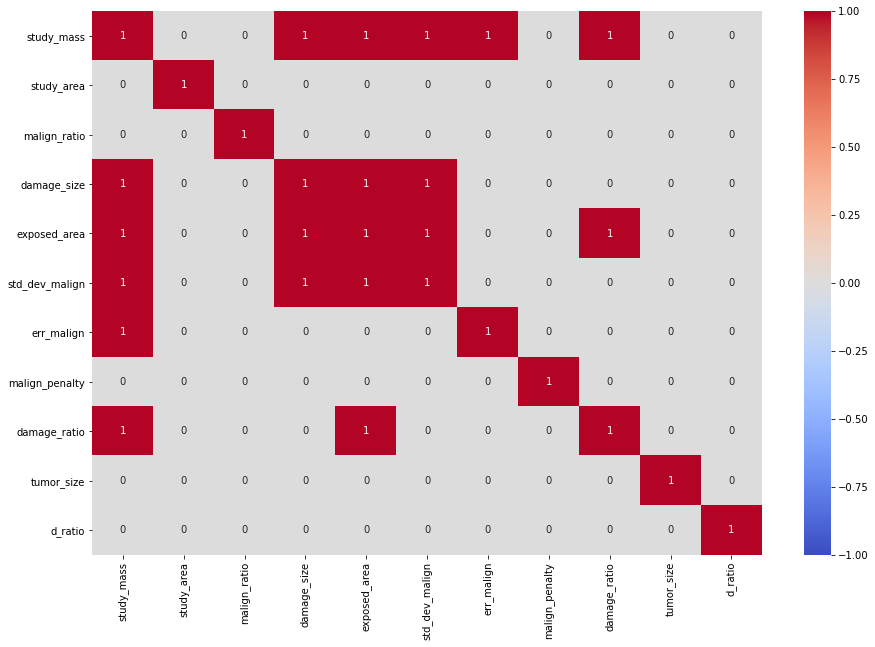

In [23]:
sns.heatmap(abs(train.cov())>.89, vmin=-1, vmax=1, annot=True, cmap='coolwarm');

### Final features

In [24]:
target = ['tumor_size']
features = train.columns.difference(target).tolist()


# Pašaliname nustatytus kintamuosius 
features.remove("study_mass")
# features.remove("study_area")
# features.remove("malign_ratio")
features.remove("damage_size")
features.remove("exposed_area")
# features.remove("std_dev_malign")
# features.remove("err_malign")
# features.remove("malign_penalty") 
# features.remove("damage_ratio")
# features.remove("d_ratio")

## 4. Choosing the regressors

__LinearRegression__

Linear regression assume that there is a linear relationship between predictors and target variables. From the data, we don't know if there is a relationship. Linear regression is very sensitive to outliers, which we have minimized. 


__Ridge__

Ridge regression is alternative to linera regression, but it normalizes the data with penalty values. Since our variables are already normalized, ridge regression shouldn't be that much different from linear regression. 


__Lasso__

Lasso regression doesn't need normal distribution. Lasso applies penalty coefficients to reduce the model's complexity. 


__ElasticNet__

ElasticNet is a lasso and ridge regression hybrid. Elastic net apllies L1 ir L2 penalty coefficients. 


__RANSACRegressor__

Iterative algorithm that learns through smaller samples and taking the mean of the results. 


__LGBMRegressor__

Gradien boosting algorithm focusing on speed and effectiveness. Gradient boosting relaies on smaller models, typically trees. 


__XGBRegressor__

Extreme gadient boosting algorithm. XGB used L1 and L2 penalty coefficients.

__SVR__

Support vector algorithm family uses hyperplains. It attempts to find the best-fitting hyperplain that shows the relationship between varibales in an n-dimensional array. 

__DecisionTreeRegressor__

Decission tree algorithm that operates with continuous values, instead of classes/labels.


__RandomForestRegressor__

Random forrest uses many decision trees for predicting the target variable. 


__KNeighborsRegressor__

K-nearest neighbour algorithms clalcualte the distances to nearest neighbours, thus learning from the data.

__MLPRegressor__

Multiple-layer Perception neural network. Just for fun.


__DummyRegressor__

Simple regressor that is not much different from a coin toss. We will use it for performance comparison.

## 5. Train the models

1. Split train date into train and validate sets 80/20 ratio.
2. Measure R$^{2}$ and root mean squared error (RMSE)
3. Compare with dummy regressor

In [25]:
TEST_SIZE = .2

In [26]:
class Experiment3000:
    
    def __init__(self, train, test, features, target, test_size=0.2):
        self.__train = train
        self.__test = test
        self.__features = features
        self.__target = target
        self.__test_size = test_size
        self.__models = []
        self.__names = []
    
    def __split_data(self, df):
        
        """Splits data into two partitions"""
        
        X = df[self.__features].values
        y = df[self.__target].values

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=self.__test_size)
        
        return x_train, x_test, y_train, y_test
    
    def __train_models(self, x_train, x_val, y_train, y_val):
        
        """Initializes and trains the models.
        Returns: dictionary of results.
        """
        
        self.__models = []
        
        self.__models.append(('Linear', LinearRegression()))
        self.__models.append(('Ridge', Ridge()))
        self.__models.append(('Lasso', Lasso()))
        self.__models.append(('ElasticNet', ElasticNet()))
        self.__models.append(('RANSAC', RANSACRegressor()))
        self.__models.append(('LGBM', LGBMRegressor(boosting_type='dart')))
        self.__models.append(('XGB', XGBRegressor(booster='dart')))
        self.__models.append(('SVR', SVR()))
        self.__models.append(('DecisionTree', DecisionTreeRegressor()))
        self.__models.append(('RandomForest', RandomForestRegressor(n_estimators=500)))
        self.__models.append(('KNeighbors', KNeighborsRegressor()))
        self.__models.append(('MLP', MLPRegressor(learning_rate='adaptive', max_iter=1000)))
        self.__models.append(('Dummy', DummyRegressor()))

        __results = {}
        self.__names = []

        for name, model in self.__models:

            model.fit(x_train, y_train.ravel())

            score = model.score(x_val, y_val.ravel())

            y_pred = model.predict(x_val)

            __results[name] = {
                    'r2': score,
                    'rmse': np.sqrt(mean_squared_error(y_val, y_pred))
                    }

            self.__names.append(name)

        return __results
    
    
    def __display_results(self, results):
        
        """Consumes dictionary of results and displays them in a tabular way."""
        
        results = sorted(results.items(), key=lambda e: e[1]['r2'])
        
        for name, scores in results:
            print("{:>12}{:>20}".format("", name))
            print('--------------------------------')
            print("{:>12}{:>20.6f}".format("R\u00b2:", scores['r2']))
            print("{:>12}{:>20.6f}".format("RMSE:", scores['rmse']))
            print("————————————————————————————————\n")
    
    def run_experiment(self):
        
        """Runs the experiment from training models to displaying the results."""
        
        x_train, x_validate, y_train, y_validate = self.__split_data(train)
        
        results = self.__train_models(x_train, x_validate, y_train, y_validate)
        
        self.__display_results(results)
        
    
    def run_prediction(self, candidate_models):
        
        """Runs the prediction for supplied models"""
        
        __results = {}
        
        if self.__models == []:
            raise ValueError("Models are not yet trained!")
        
        for name, model in ((n, m) for n, m in self.__models if n in candidate_models):
    
            x_test = self.__test[self.__features].values
            y_test = self.__test[self.__target].values

            y_pred = model.predict(x_test)
            
            __results[name] = {
                    'r2': r2_score(y_test, y_pred),
                    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
                    }

        self.__display_results(__results)

In [27]:
exp = Experiment3000(train, test, features, target, test_size=TEST_SIZE)

In [28]:
exp.run_experiment()

                          RANSAC
--------------------------------
         R²:           -0.010644
       RMSE:            1.017856
————————————————————————————————

                           Lasso
--------------------------------
         R²:           -0.000012
       RMSE:            1.012487
————————————————————————————————

                      ElasticNet
--------------------------------
         R²:           -0.000012
       RMSE:            1.012487
————————————————————————————————

                           Dummy
--------------------------------
         R²:           -0.000012
       RMSE:            1.012487
————————————————————————————————

                    DecisionTree
--------------------------------
         R²:            0.170084
       RMSE:            0.922368
————————————————————————————————

                           Ridge
--------------------------------
         R²:            0.299823
       RMSE:            0.847210
————————————————————————————————

    

## 6. Išsirenkame tinkamiausią ir tikriname su testiniais duomenimis

In [29]:
exp.run_prediction(['LGBM', 'XGB', 'RandomForest', 'KNeighbors', 'MLP'])

                      KNeighbors
--------------------------------
         R²:            0.418001
       RMSE:            0.762889
————————————————————————————————

                             XGB
--------------------------------
         R²:            0.505462
       RMSE:            0.703234
————————————————————————————————

                    RandomForest
--------------------------------
         R²:            0.559096
       RMSE:            0.664006
————————————————————————————————

                             MLP
--------------------------------
         R²:            0.584785
       RMSE:            0.644371
————————————————————————————————

                            LGBM
--------------------------------
         R²:            0.598118
       RMSE:            0.633942
————————————————————————————————



## 7. Conclusions

- LGBM scored the best in R$^{2}$ and in RMSE values
- None of the models performs better than 0.6 R$^{2}$
- It's better than no model, but nothing to write home about
- H0 is rejected, as R$^{2}$ is below 0.8.
- It's impossible to predict a size of the tumor solely from the skin sample measurements

## Afterthoughts

- The data is not described well. It wasn't possible to infer if size and area are the same, and whether we could have engineered additional features to make our models perform better.
- We could, in theory, get better results if we wrote an image recognition program and extract measurements from the images.
    - But this would be too big of a scope for this project
    - I would need consultations from computer vison or medical professionals